### Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_apps = pd.read_csv("googleplaystore.csv")
#df_reviews = pd.read_csv("googleplaystore_user_reviews.csv")

### Updating str values to integers

In [3]:
for i in range(0, df_apps.shape[0]):
    df_apps['Installs'][i] = df_apps['Installs'][i].replace('+','') 
    df_apps['Installs'][i] = df_apps['Installs'][i].replace(',','')
    if df_apps['Installs'][i].isdigit():
        df_apps["Installs"][i] = int(df_apps['Installs'][i])
    else:
        df_apps = df_apps.drop(labels=i,axis=0)

C:\Users\ufukc\AppData\Local\Temp\ipykernel_12008\1319008515.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_apps['Installs'][i] = df_apps['Installs'][i].replace('+','')
C:\Users\ufukc\AppData\Local\Temp\ipykernel_12008\1319008515.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_apps['Installs'][i] = df_apps['Installs'][i].replace(',','')
C:\Users\ufukc\AppData\Local\Temp\ipykernel_12008\1319008515.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

### Dropping null values

In [4]:
df_apps["Installs"] = df_apps["Installs"].dropna()

### Removing duplicates by name

In [5]:
df_apps=df_apps.drop_duplicates(subset=['App'])

In [6]:
df_apps.sort_values(by=['Installs','Rating','Reviews'],ascending=False).head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2545,Instagram,SOCIAL,4.5,66577313,Varies with device,1000000000,Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
1654,Subway Surfers,GAME,4.5,27722264,76M,1000000000,Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
2808,Google Photos,PHOTOGRAPHY,4.5,10858556,Varies with device,1000000000,Free,0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device


# Second Week's Assignment

## Removing Dollar sign and making values float

In [7]:
df_apps['Price'] =df_apps['Price'].apply(lambda x:  x.replace('$','') if not x.isdigit() else x)
df_apps['Price'] = df_apps['Price'].apply(float)

## Creating Total Profit Column

In [8]:
df_apps['Total Profit'] = df_apps['Price']*df_apps['Installs']

## BAR CHART


In [9]:
barchart = df_apps.groupby('Category')['Total Profit'].sum().sort_values(ascending=0).head(10)
barchart.info

<bound method Series.info of Category
FAMILY             113679845.36
LIFESTYLE            57583939.4
GAME                40688636.85
FINANCE             25726678.98
PHOTOGRAPHY           8547767.7
PERSONALIZATION      6796947.56
MEDICAL              5957535.67
TOOLS                5464820.59
SPORTS               4706211.95
PRODUCTIVITY         4313374.95
Name: Total Profit, dtype: object>

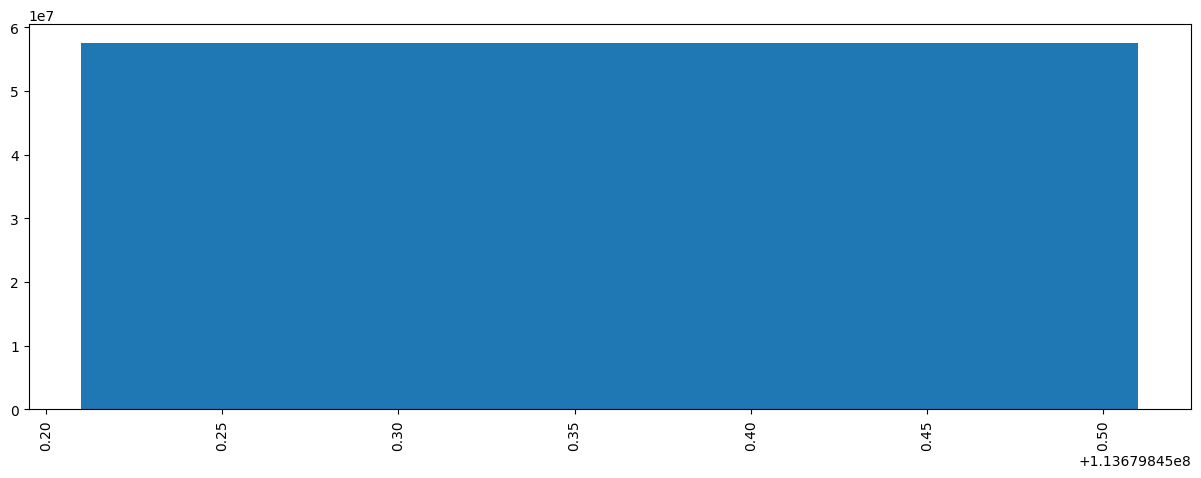

In [16]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
plt.bar(barchart.index, barchart.index, width=0.3)
plt.show()

## 3- a)plot a bar chart for the total prices of each paid app in each category

AttributeError: 'AxesSubplot' object has no attribute 'info'

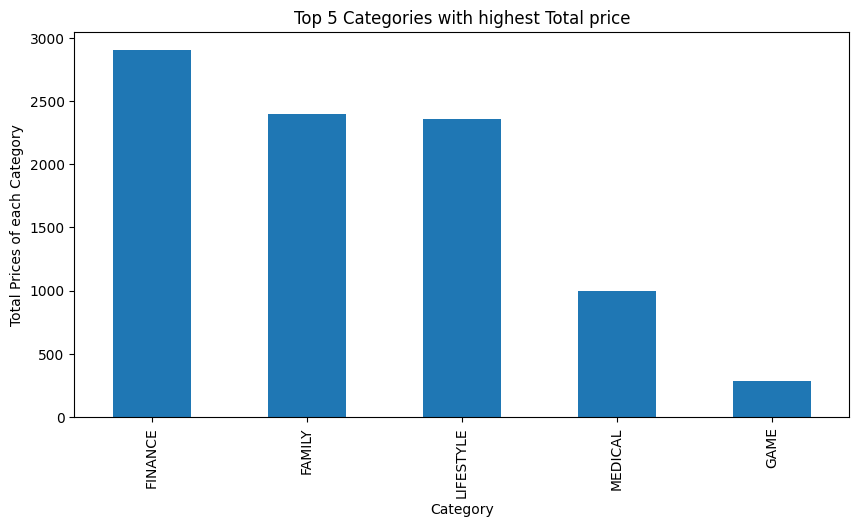

In [15]:
chart = df_apps.groupby('Category')['Price'].sum().sort_values(ascending=0).head(5).plot(kind='bar',title='Top 5 Categories with highest Total price',ylabel='Total Prices of each Category',figsize=(10,5))
